In [1]:
#do not change this
"""
from keras.optimizers import RMSprop
model1=Sequential()
model1.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
model1.add(Dense(units=40,activation='tanh'))
model1.add(Dense(units=20,activation='tanh'))
model1.add(Dense(units=days,activation='linear'))
model1.compile(loss='mae',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])
model1.fit(x_train,y_train,validation_split=0.1,epochs=50)

plt.plot(y_test[:,3])
plt.plot(predict[:,3])"""

"\nfrom keras.optimizers import RMSprop\nmodel1=Sequential()\nmodel1.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))\nmodel1.add(Dense(units=40,activation='tanh'))\nmodel1.add(Dense(units=20,activation='tanh'))\nmodel1.add(Dense(units=days,activation='linear'))\nmodel1.compile(loss='mae',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])\nmodel1.fit(x_train,y_train,validation_split=0.1,epochs=50)\n\nplt.plot(y_test[:,3])\nplt.plot(predict[:,3])"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

In [3]:
df=pd.read_csv('updated_final_df.csv',infer_datetime_format=True,index_col='Date')

In [4]:
df.head()

Open      High       Low     Close  Adj Close   Volume  \
Date                                                                     
2002-07-05  1.642813  1.704375  1.642188  1.671875   1.125311   960000   
2002-07-08  1.699375  1.718125  1.671250  1.695313   1.141087  3520000   
2002-07-09  1.701563  1.739063  1.664688  1.720313   1.157914  4240000   
2002-07-10  1.705000  1.759063  1.691250  1.716875   1.155600  2364800   
2002-07-11  1.727813  1.761250  1.659375  1.753438   1.180210  3388800   

            CLOSE_MOV_AVG_IND  CLOSE_EMA_IND  CLOSE_RSI_IND  \
Date                                                          
2002-07-05           1.671875       1.671875     100.000000   
2002-07-08           1.683594       1.695313     100.000000   
2002-07-09           1.695834       1.720313     100.000000   
2002-07-10           1.710834       1.716875      92.663500   
2002-07-11           1.730209       1.753438      96.013318   

            CLOSE_IND_MACD_LINE  ...  MAE_upper  MAE_middle  MAE_lower  \
Date                             ...                                     
2002-07-05             0.036094  ...   1.705313    1.671875   1.638437   
2002-07-08             0.034505  ...   1.717266    1.683594   1.649922   
2002-07-09             0.034861  ...   1.729750    1.695834   1.661917   
2002-07-10             0.034468  ...   1.735116    1.701094   1.667072   
2002-07-11             0.036684  ...   1.745794    1.711563   1.677332   

                ROC  Williams_%R        PROC         CMO      A/D_Line  \
Date                                                                     
2002-07-05  0.36337   -52.261727  100.766994  100.000000 -4.342515e+04   
2002-07-08  0.36337   -30.040692  100.766994  100.000000  5.051661e+04   
2002-07-09  0.36337   -19.354839  100.766994  100.000000  2.152701e+06   
2002-07-10  0.36337   -36.096684  100.766994   33.333333  1.575110e+06   
2002-07-11  0.36337    -6.561287  100.766994   50.000000  4.444189e+06   

                TRIX           EOM  
Date                                
2002-07-05  0.042760  1.248353e-10  
2002-07-08  0.002738  2.850586e-10  
2002-07-09  0.010108  2.055726e-10  
2002-07-10  0.019840  3.595837e-10  
2002-07-11  0.034965  1.581267e-10  

[5 rows x 34 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5285 entries, 2002-07-05 to 2023-07-03
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Open                           5285 non-null   float64
 1   High                           5285 non-null   float64
 2   Low                            5285 non-null   float64
 3   Close                          5285 non-null   float64
 4   Adj Close                      5285 non-null   float64
 5   Volume                         5285 non-null   int64  
 6   CLOSE_MOV_AVG_IND              5285 non-null   float64
 7   CLOSE_EMA_IND                  5285 non-null   float64
 8   CLOSE_RSI_IND                  5285 non-null   float64
 9   CLOSE_IND_MACD_LINE            5285 non-null   float64
 10  CLOSE_IND_MACD_SINGLE_LINE     5285 non-null   float64
 11  CLOSE_IND_MACD_HISTOGRAM       5285 non-null   float64
 12  CLOSE_IND_OBV                  5285 no

In [6]:
df.corr()

Open      High       Low     Close  \
Open                           1.000000  0.999885  0.999878  0.999747   
High                           0.999885  1.000000  0.999849  0.999884   
Low                            0.999878  0.999849  1.000000  0.999884   
Close                          0.999747  0.999884  0.999884  1.000000   
Adj Close                      0.996050  0.996247  0.996142  0.996281   
Volume                        -0.168504 -0.164862 -0.172576 -0.168883   
CLOSE_MOV_AVG_IND              0.999768  0.999738  0.999700  0.999664   
CLOSE_EMA_IND                  0.999747  0.999884  0.999884  1.000000   
CLOSE_RSI_IND                  0.033520  0.034893  0.037574  0.038600   
CLOSE_IND_MACD_LINE            0.110642  0.109208  0.112580  0.111104   
CLOSE_IND_MACD_SINGLE_LINE     0.116870  0.114931  0.117842  0.116050   
CLOSE_IND_MACD_HISTOGRAM       0.003607  0.004834  0.006894  0.007544   
CLOSE_IND_OBV                  0.801445  0.800440  0.802571  0.801562   
CLOSE_IND_SAR                  0.995205  0.995140  0.994896  0.994878   
bollinger_bands_sma            0.999747  0.999884  0.999884  1.000000   
bollinger_bands_upper_band     0.999747  0.999884  0.999884  1.000000   
bollinger_bands_lower_band     0.999747  0.999884  0.999884  1.000000   
SO_k_values                    0.039806  0.042475  0.044652  0.047275   
SO_D_values                    0.047247  0.047584  0.049727  0.049950   
ATR                            0.800798  0.803602  0.798203  0.801039   
Volume_Weighted_Average_price  0.798354  0.798142  0.798739  0.798380   
Chaikin_money_flow             0.034970  0.035683  0.036785  0.038464   
Average_Directional_index     -0.025628 -0.026151 -0.024996 -0.025538   
Commodity_channel_index(CCI    0.054335  0.055948  0.058195  0.058770   
MAE_upper                      0.996708  0.996699  0.996418  0.996431   
MAE_middle                     0.996708  0.996699  0.996418  0.996431   
MAE_lower                      0.996708  0.996699  0.996418  0.996431   
ROC                           -0.009743 -0.008874 -0.006694 -0.006028   
Williams_%R                    0.039806  0.042475  0.044652  0.047275   
PROC                           0.005160  0.006343  0.008583  0.009490   
CMO                            0.031012  0.030859  0.033714  0.033579   
A/D_Line                       0.700294  0.699228  0.701607  0.700394   
TRIX                           0.033541  0.032051  0.034361  0.033110   
EOM                            0.167134  0.167516  0.169974  0.169409   

                               Adj Close    Volume  CLOSE_MOV_AVG_IND  \
Open                            0.996050 -0.168504           0.999768   
High                            0.996247 -0.164862           0.999738   
Low                             0.996142 -0.172576           0.999700   
Close                           0.996281 -0.168883           0.999664   
Adj Close                       1.000000 -0.177462           0.996032   
Volume                         -0.177462  1.000000          -0.166062   
CLOSE_MOV_AVG_IND               0.996032 -0.166062           1.000000   
CLOSE_EMA_IND                   0.996281 -0.168883           0.999664   
CLOSE_RSI_IND                   0.027415 -0.164006           0.028218   
CLOSE_IND_MACD_LINE             0.096848 -0.145174           0.108477   
CLOSE_IND_MACD_SINGLE_LINE      0.101121 -0.126087           0.115858   
CLOSE_IND_MACD_HISTOGRAM        0.006691 -0.086528          -0.000292   
CLOSE_IND_OBV                   0.777599 -0.142703           0.801226   
CLOSE_IND_SAR                   0.991586 -0.155995           0.995706   
bollinger_bands_sma             0.996281 -0.168883           0.999664   
bollinger_bands_upper_band      0.996281 -0.168883           0.999664   
bollinger_bands_lower_band      0.996281 -0.168883           0.999664   
SO_k_values                     0.040574 -0.145327           0.034537   
SO_D_values                     0.042905 -0.130606           0.044244   
ATR                

# Scaling the data

In [7]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaled_data=scaler.fit_transform(df)

In [8]:
scaled_data.shape

(5285, 34)

In [9]:
'''from sklearn.decomposition import PCA
pca=PCA()
pca_data=pca.fit_transform(scaled_data)
pca_data.shape'''

'from sklearn.decomposition import PCA\npca=PCA()\npca_data=pca.fit_transform(scaled_data)\npca_data.shape'

# Get Independent and dependent features

In [11]:
x=scaled_data
window=30
days = 7
ln = (len(x)-window)%(days)
x = x[0:len(x)-ln]

def independet_prep(window,x):
    independent_features = []
    for i in range(window, len(x), days):
        independent_features.append(x[i-window:i])

    independent_features = np.array(independent_features)
    return independent_features


def dependent_prep(window,x):
    dependent_features = []
    for i in range(window, len(x), days):
        dependent_features.append(x[i:i+days,3])
        
    dependent_features = np.array(dependent_features)
    #here dependent_features[1: ] to all because the response at first index i don't want 
    return dependent_features

x1=independet_prep(window,x)
y1=dependent_prep(window,x)
#cls = x[window:,3]


In [12]:
x1.shape

(750, 30, 34)

In [13]:
y1.shape
#y1.reshape(x1.shape[0],y1.shape[1])

(750, 7)

# splitting the data in training and test sets

In [14]:
training_size=round(len(x1)*0.7)
val_size=round(len(x1)*0.5)
x_train,y_train=x1[:training_size],y1[:training_size]
x_val,y_val=x1[val_size:training_size],y1[val_size:training_size]
x_test,y_test=x1[training_size:],y1[training_size:]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(525, 30, 34)
(525, 7)
(150, 30, 34)
(150, 7)
(225, 30, 34)
(225, 7)


# Building model

In [15]:
'''def model_keras(learning_rate=0.001,optimizers=Adam,activation='tanh'):
    model=Sequential()
    model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
    #model.add(Dense(units=40,activation=activation))
    model.add(Dense(units=20,activation=activation))
    model.add(Dense(units=days,activation='linear'))
    model.compile(loss='mae',optimizer=optimizers,metrics=['mean_absolute_error'])
    return model

from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

keras_model = KerasClassifier(build_fn=model_keras)
param_grid={'epochs':[50,80,100,200],
            'learning_rate':[0.01,0.001,0.0001,0.1],
             'optimizers':['Adam','RMSProp','SGD'],
             'activation':['sigmoid','tanh','relu']}

random_search=RandomizedSearchCV(keras_model,param_grid,random_state=0)

search=random_search.fit(x_train,y_train,validation_split=0.3)
best_prameter=search.best_params_
print("best_parameter",best_prameter)
best_sc=search.best_score_
print("best_score",best_sc)
score=search.score
print("score",score)'''

'def model_keras(learning_rate=0.001,optimizers=Adam,activation=\'tanh\'):\n    model=Sequential()\n    model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))\n    #model.add(Dense(units=40,activation=activation))\n    model.add(Dense(units=20,activation=activation))\n    model.add(Dense(units=days,activation=\'linear\'))\n    model.compile(loss=\'mae\',optimizer=optimizers,metrics=[\'mean_absolute_error\'])\n    return model\n\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\n\nkeras_model = KerasClassifier(build_fn=model_keras)\nparam_grid={\'epochs\':[50,80,100,200],\n            \'learning_rate\':[0.01,0.001,0.0001,0.1],\n             \'optimizers\':[\'Adam\',\'RMSProp\',\'SGD\'],\n             \'activation\':[\'sigmoid\',\'tanh\',\'relu\']}\n\nrandom_search=RandomizedSearchCV(keras_model,param_grid,random_state=0)\n\nsearch=random_search.fit(x_train,y_train,validation_split=0.3)\nbest_prameter=searc

In [16]:
'''from sklearn.model_selection import KFold
import numpy as np

k = 5
metrics = []

kf = KFold(n_splits=k, shuffle=True)

for train_index, val_index in kf.split(x_train):
    X_train, X_val = x_train[train_index], x_train[val_index]
    print(X_train.shape,X_val.shape)
    print(y_train.shape)
    Y_train, Y_val = y_train[train_index], y_train[val_index]
    print(y_train.shape,y_val.shape)

    model1.fit(X_train, Y_train, validation_data=(X_val, Y_val))

    scores = model1.evaluate(X_val, y_val)
    metrics.append(scores)
    #print(scores)

average_metric = np.mean(metrics)

print("Average metric:", average_metric)
'''

'from sklearn.model_selection import KFold\nimport numpy as np\n\nk = 5\nmetrics = []\n\nkf = KFold(n_splits=k, shuffle=True)\n\nfor train_index, val_index in kf.split(x_train):\n    X_train, X_val = x_train[train_index], x_train[val_index]\n    print(X_train.shape,X_val.shape)\n    print(y_train.shape)\n    Y_train, Y_val = y_train[train_index], y_train[val_index]\n    print(y_train.shape,y_val.shape)\n\n    model1.fit(X_train, Y_train, validation_data=(X_val, Y_val))\n\n    scores = model1.evaluate(X_val, y_val)\n    metrics.append(scores)\n    #print(scores)\n\naverage_metric = np.mean(metrics)\n\nprint("Average metric:", average_metric)\n'

In [17]:
x_val.shape,y_val.shape

((150, 30, 34), (150, 7))

In [59]:
model1=Sequential()
model1.add(LSTM(units=100,input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=False))
#model1.add(LSTM(units=60,return_sequences=False))

#model1.add(Dense(units=70,activation='tanh'))
#model1.add(Dense(units=50,activation='tanh'))
#model1.add(Dense(units=25,activation='tanh'))
#model1.add(Dense(units=10,activation='tanh'))

model1.add(Dense(units=days))


model1.compile(loss='mae',optimizer='Adam',metrics=['mean_absolute_error'])
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100)

Epoch 1/100
17/17 [==============================] - 8s 258ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - val_loss: 0.0527 - val_mean_absolute_error: 0.0527
Epoch 2/100
17/17 [==============================] - 1s 35ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 3/100
17/17 [==============================] - 1s 34ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259
Epoch 4/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 5/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.0234 - val_mean_absolute_error: 0.0234
Epoch 6/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230
Epoch 7/100
17/

# Training and testing error and their predictions

In [60]:
predict=model1.predict(x_test)
print("shape of predict",predict.shape)
print("shape of y_test",y_test.shape)

8/8 [==============================] - 1s 12ms/step
shape of predict (225, 7)
shape of y_test (225, 7)


In [61]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,predict)
print("Test_error",mae)

Test_error 0.05501646304932314


In [62]:
train_predict=model1.predict(x_train)
print("shape of train_predict",train_predict.shape)
print("shape of y_train",y_train.shape)

17/17 [==============================] - 0s 14ms/step
shape of train_predict (525, 7)
shape of y_train (525, 7)


In [63]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,train_predict)
print("Train_error",mae)

Train_error 0.014165292201052905


In [64]:
predict.shape,y_test.shape

((225, 7), (225, 7))

# Visualizing actual and predctions of each day

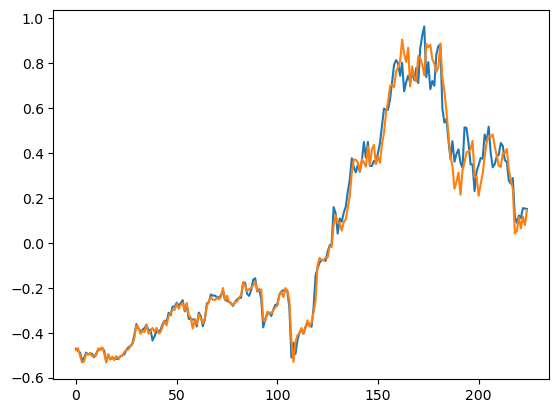

In [65]:
plt.plot(y_test[:,0])
plt.plot(predict[:,1])

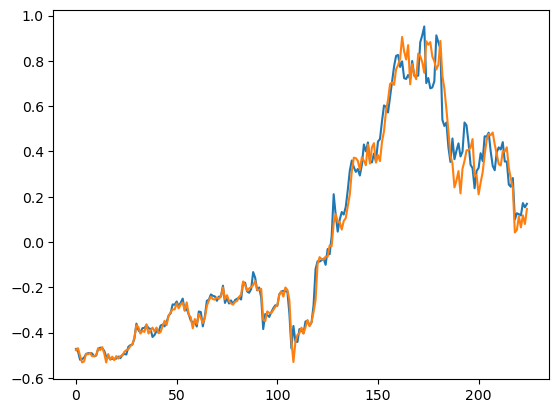

In [66]:
plt.plot(y_test[:,1])
plt.plot(predict[:,1])

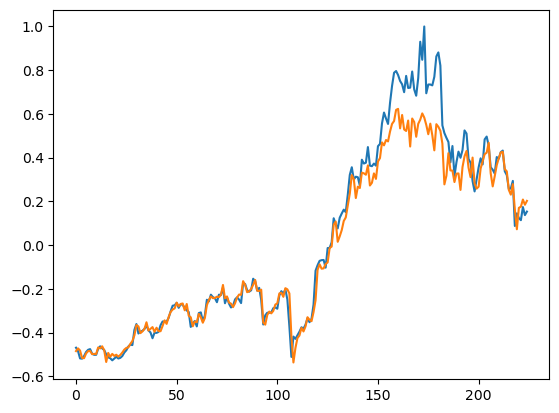

In [67]:
plt.plot(y_test[:,2])
plt.plot(predict[:,2])

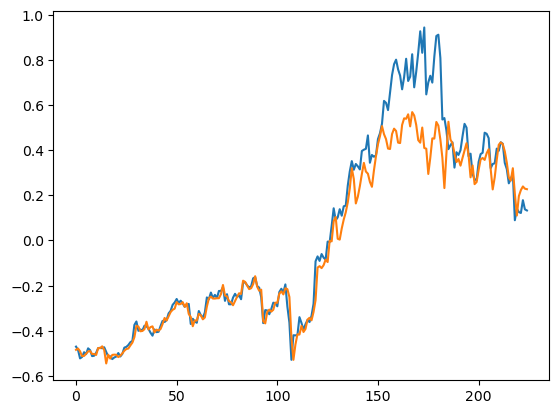

In [68]:
plt.plot(y_test[:,3])
plt.plot(predict[:,3])

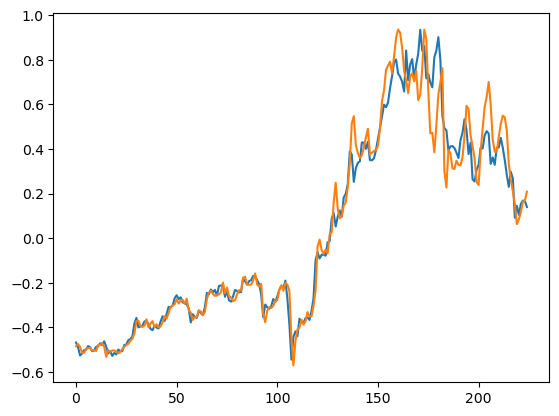

In [69]:
plt.plot(y_test[:,4])
plt.plot(predict[:,4])

In [70]:
#plt.plot(y_test)
#plt.plot(predict)

# Actual vs prediction of all days 

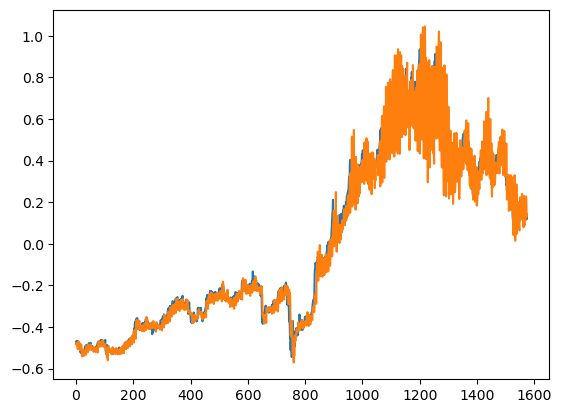

In [71]:
plt.plot(y_test.flatten())
plt.plot(predict.flatten())

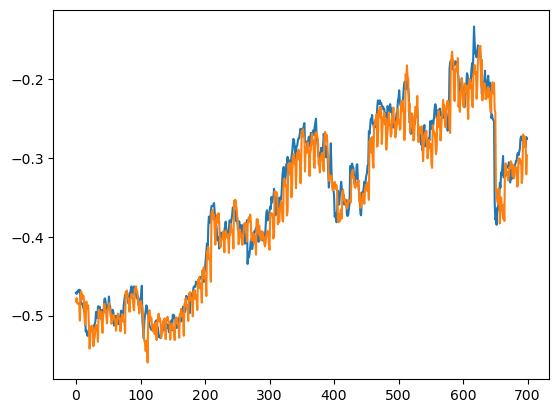

In [72]:
plt.plot(y_test[:100].flatten())
plt.plot(predict[:100].flatten())

# Actual and predicted alone flattened visualization

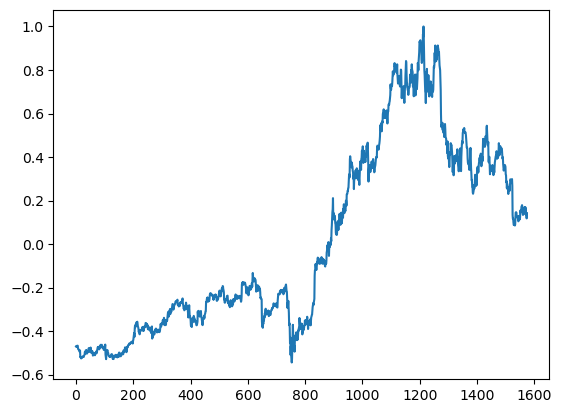

In [73]:
plt.plot(y_test.flatten())


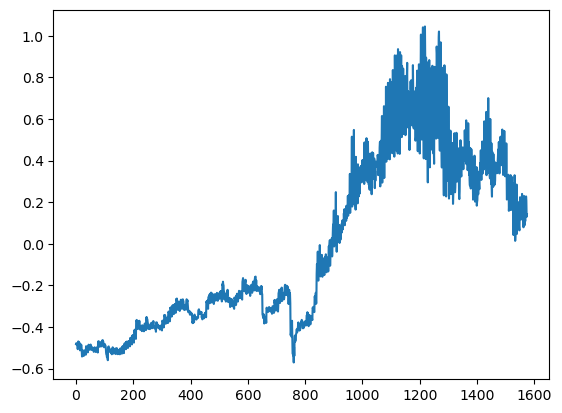

In [74]:
plt.plot(predict.flatten())

# Actual vs prediction 7 days split

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


length of data list 1575
length of actual data after flatten and list 1575
shape of reshaped_data 225
shape of reshaped_data 225


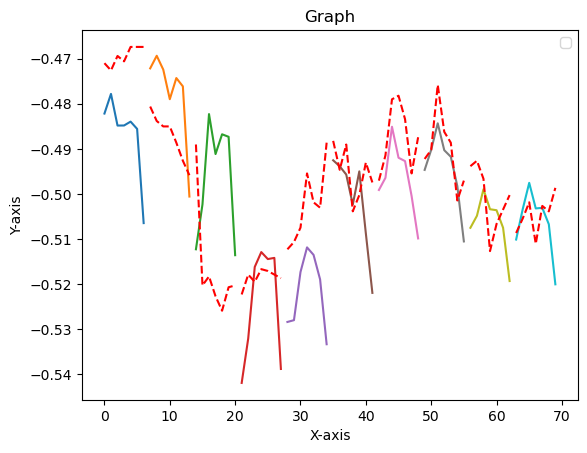

In [75]:
data=predict.flatten()
#data = predict_flatten.tolist()  
print("length of data list",len(data))

# Flatten and convert actual values to a list
actual_data = y_test.flatten()
#actual_data = actual_flatten.tolist()
print("length of actual data after flatten and list",len(actual_data))

# Reshape the data to have 7 columnsa

reshaped_data = [data[i:i+7] for i in range(0, len(data), 7)]
print("shape of reshaped_data",len(reshaped_data))

# Create the plot
fig, ax = plt.subplots()
for i, row in enumerate(reshaped_data[:10]): 
    x= range(i*7, (i+1)*7)
    ax.plot(x, row)

reshaped_data2 = [actual_data[i:i+7] for i in range(0, len(actual_data), 7)]
print("shape of reshaped_data",len(reshaped_data2))

for j, col in enumerate(reshaped_data2[:10]): 
    y = range(j*7, (j+1)*7)
    ax.plot(y, col,linestyle='--', color='red')

# Plot each row of data (actual values)
#plt.plot(y_test[: :5])
# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Graph')
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


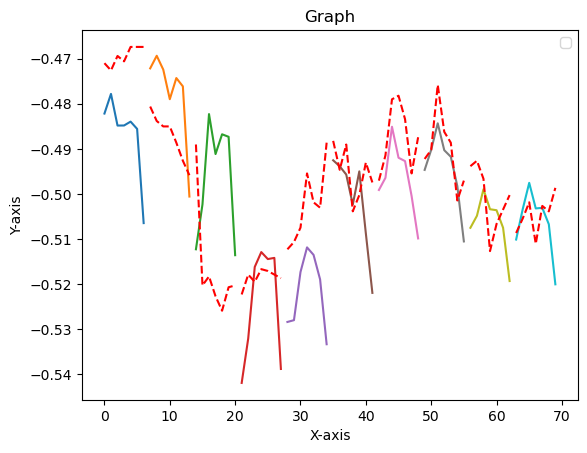

In [76]:

#print("predict shape",predict.shape)
predict_flatten=predict.flatten()
data =predict_flatten
#print("length of data list",len(data))
actual_flatten = y_test.flatten()
actual_data =actual_flatten

reshaped_data = [data[i:i+days] for i in range(0, len(data), days)]
fig, ax = plt.subplots()
for i, row in enumerate(reshaped_data[:10]): 
    x = range(i*days, (i+1)*days)
    ax.plot(x, row)  


    
reshaped_data2 = [actual_data[i:i+days] for i in range(0, len(actual_data), days)]
# Plot each row of data (actual values)
for j, col in enumerate(reshaped_data2[:10]):
    y = range(j*days, (j+1)*days)
    ax.plot(y, col, linestyle='--', color='red')
    
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Graph')
ax.legend()
plt.show()

In [77]:
'''plt.figure(figsize=(20,10))
predict_0=predict[:,0]
predict_1=predict[:,1]
predict_2=predict[:,2]
predict_3=predict[:,3]
predict_4=predict[:,4]
predict_5=predict[:,5]
predict_6=predict[:,6]
c=np.concatenate((predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6))
print(c.shape)
actual_0=y_test[:,0]
actual_1=y_test[:,1]
actual_2=y_test[:,2]
actual_3=y_test[:,3]
actual_4=y_test[:,4]
actual_5=y_test[:,5]
actual_6=y_test[:,6]
w=np.concatenate((actual_0,actual_1,actual_2,actual_3,actual_4,actual_5,actual_6))
print(w.shape)
# f=w[:100]


print(plt.plot(c,color='red'))
print(plt.plot(w,color='green'))

# '''

"plt.figure(figsize=(20,10))\npredict_0=predict[:,0]\npredict_1=predict[:,1]\npredict_2=predict[:,2]\npredict_3=predict[:,3]\npredict_4=predict[:,4]\npredict_5=predict[:,5]\npredict_6=predict[:,6]\nc=np.concatenate((predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6))\nprint(c.shape)\nactual_0=y_test[:,0]\nactual_1=y_test[:,1]\nactual_2=y_test[:,2]\nactual_3=y_test[:,3]\nactual_4=y_test[:,4]\nactual_5=y_test[:,5]\nactual_6=y_test[:,6]\nw=np.concatenate((actual_0,actual_1,actual_2,actual_3,actual_4,actual_5,actual_6))\nprint(w.shape)\n# f=w[:100]\n\n\nprint(plt.plot(c,color='red'))\nprint(plt.plot(w,color='green'))\n\n# "